#### Problem Statement

Predict Health Insurance Owners' who will be interested in Vehicle Insurance


Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, we have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Read the dataset
Insurance_df = pd.read_csv(r"Data\health_insurance.csv")

In [4]:
# check the info of the dataset
print("Shape:", Insurance_df.shape)
Insurance_df.info()

Shape: (381109, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [5]:
# unique values
Insurance_df.nunique().sort_values()

Gender                       2
Driving_License              2
Vehicle_Damage               2
Previously_Insured           2
Response                     2
Vehicle_Age                  3
Region_Code                 53
Age                         66
Policy_Sales_Channel       155
Vintage                    290
Annual_Premium           48838
id                      381109
dtype: int64

In [6]:
# Check for duplicates, missingno
print("Duplicates: ", Insurance_df.duplicated().sum())

Duplicates:  0


In [7]:
Insurance_df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [8]:
# Continuous features
num_columns = ['Age', 'Region_Code', 'Annual_Premium', 'Vintage']
Insurance_df[num_columns].describe()

,Age,Region_Code,Annual_Premium,Vintage
count,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,26.388807,30564.389581,154.347397
std,15.511611,13.229888,17213.155057,83.671304
min,20.000000,0.000000,2630.000000,10.000000
25%,25.000000,15.000000,24405.000000,82.000000
50%,36.000000,28.000000,31669.000000,154.000000
75%,49.000000,35.000000,39400.000000,227.000000
max,85.000000,52.000000,540165.000000,299.000000


In [9]:
# Categorical features
print("Categories in 'Gender' variable: ", end=" ")
print(Insurance_df['Gender'].unique())
print("Categories in 'Vehicle_Age' variable: ", end=" ")
print(Insurance_df['Vehicle_Age'].unique())
print("Categories in 'Vehicle_Damage' variable: ", end=" ")
print(Insurance_df['Vehicle_Damage'].unique())

Categories in 'Gender' variable:  ['Male' 'Female']
Categories in 'Vehicle_Age' variable:  ['> 2 Years' '1-2 Year' '< 1 Year']
Categories in 'Vehicle_Damage' variable:  ['Yes' 'No']


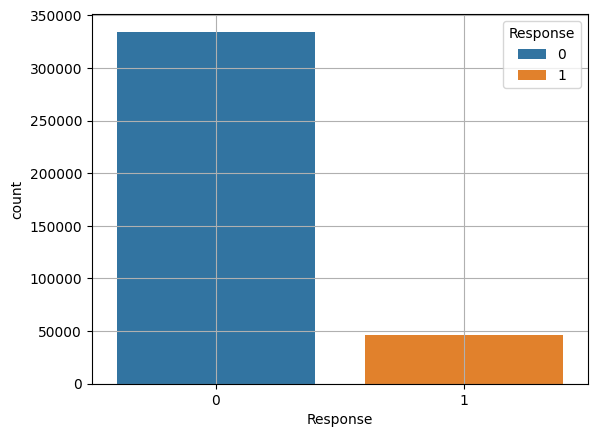

In [10]:
# Target Variable: Response
sns.countplot(x='Response', hue='Response', data=Insurance_df)
plt.grid(True)

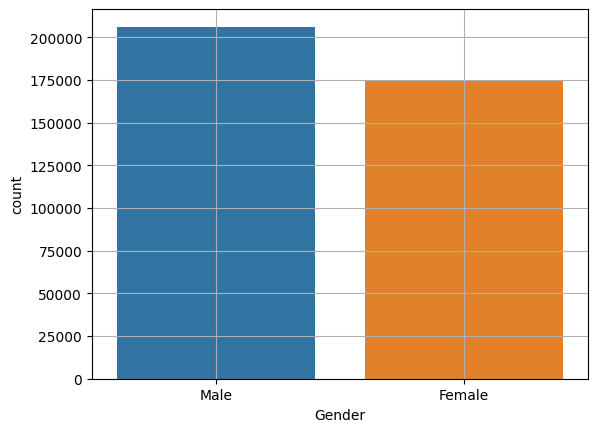

In [11]:
# Gender/Response
sns.countplot(x='Gender', hue='Gender', data=Insurance_df)
plt.grid(True)

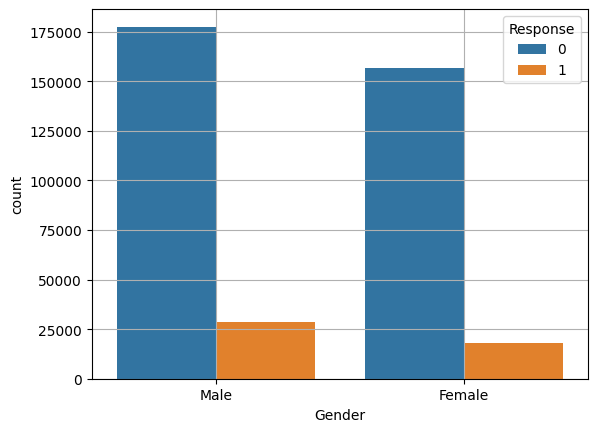

In [12]:
sns.countplot(data=Insurance_df, x='Gender', hue='Response')
plt.grid(True)

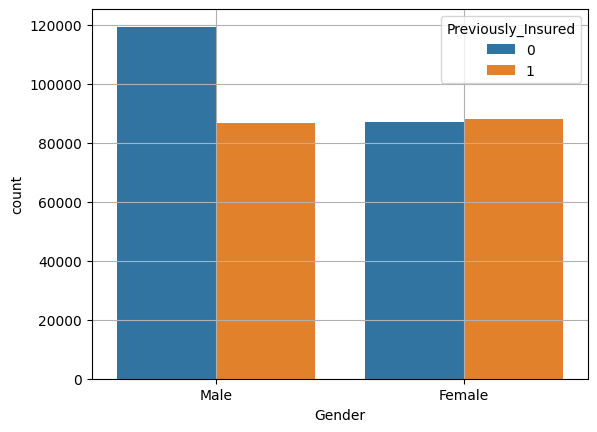

In [13]:
sns.countplot(data=Insurance_df, x='Gender', hue='Previously_Insured')
plt.grid(True)

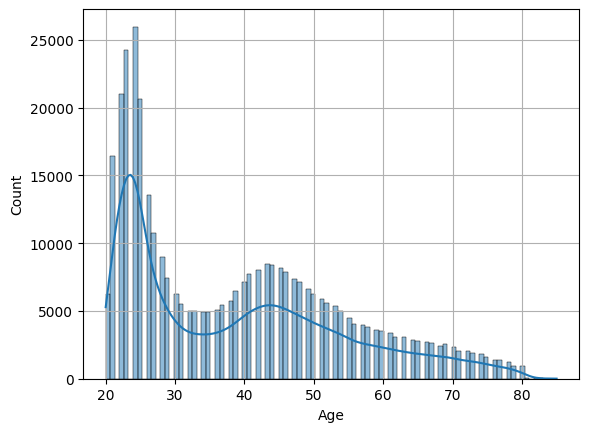

In [14]:
# Age Distribution
sns.histplot(Insurance_df['Age'], kde=True)
plt.grid()

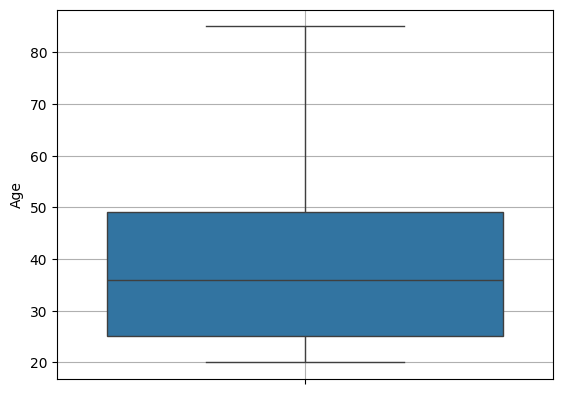

In [15]:
sns.boxplot(y='Age', data=Insurance_df)
plt.grid()


<Axes: xlabel='Age', ylabel='Annual_Premium'>

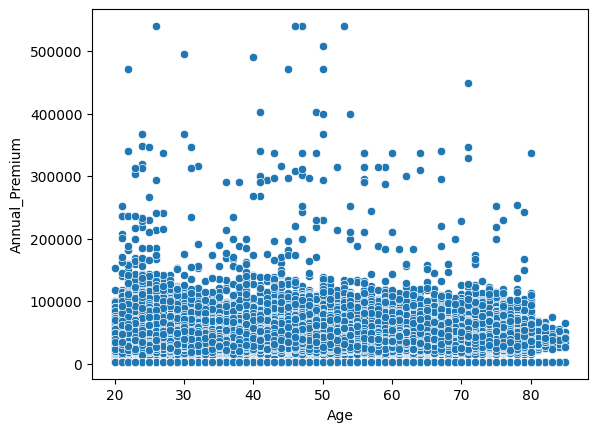

In [16]:
# Age vs Annual Premium
sns.scatterplot(x=Insurance_df['Age'], y=Insurance_df['Annual_Premium'])

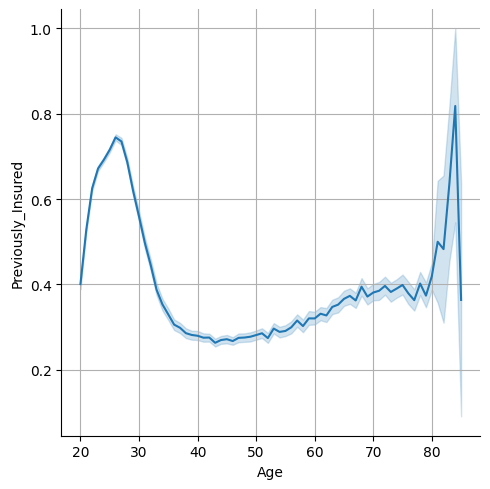

In [17]:
sns.relplot(data=Insurance_df, x='Age', y='Previously_Insured', kind='line')
plt.grid()
plt.show()

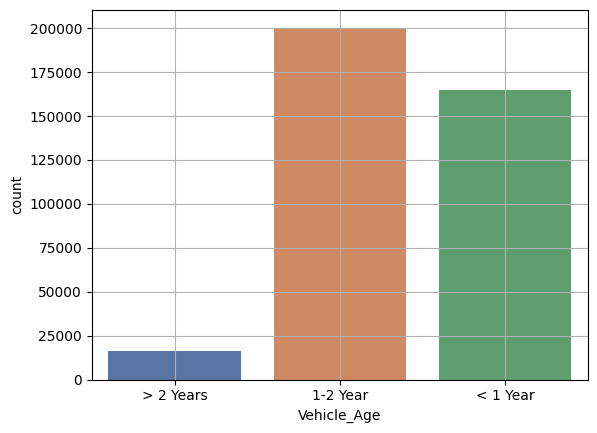

In [18]:
# Vehicle Age/Vehicle Damage
sns.countplot(x='Vehicle_Age', data=Insurance_df, hue='Vehicle_Age', palette='deep')
plt.grid()

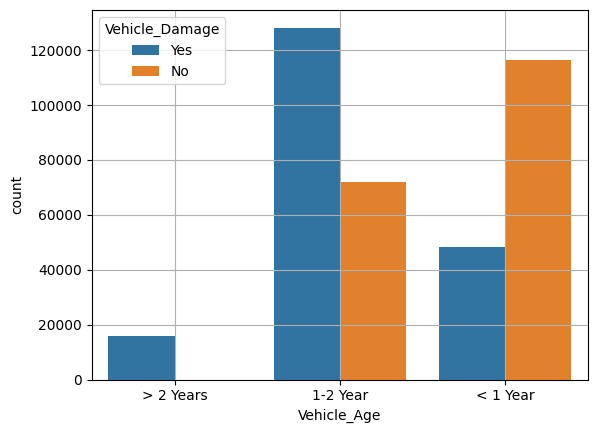

In [19]:
sns.countplot(data=Insurance_df, x='Vehicle_Age', hue='Vehicle_Damage')
plt.grid()
plt.show()

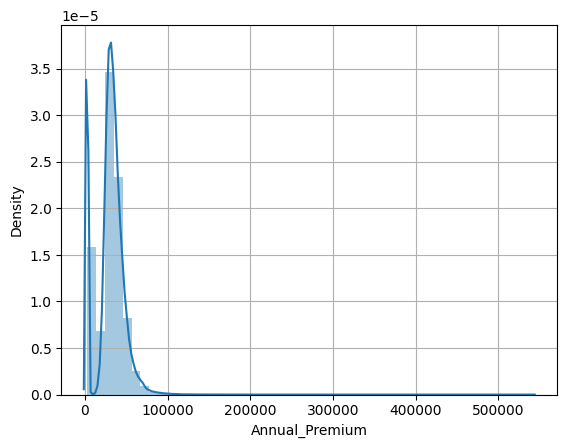

In [20]:
# Annual Premium
sns.distplot(Insurance_df['Annual_Premium'])
plt.grid()

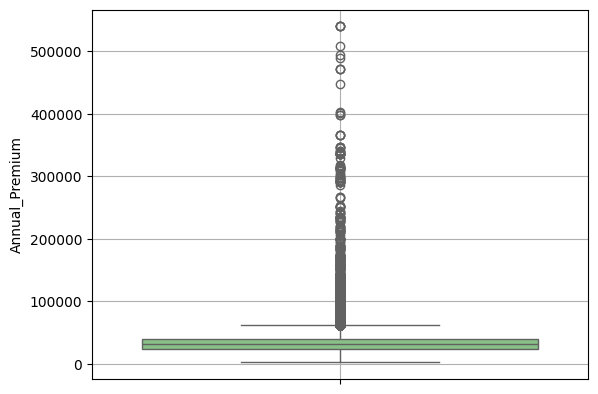

In [21]:
sns.boxplot(y='Annual_Premium', data=Insurance_df, palette='Accent')
plt.grid()

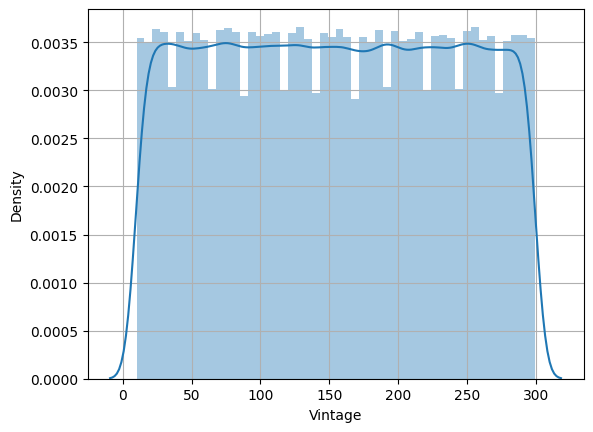

In [22]:
# Vintage
sns.distplot(Insurance_df['Vintage'])
plt.grid()